<a href="https://colab.research.google.com/github/dongchimi12/KKJ/blob/main/%EC%B5%9C%EC%A2%85%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%202%ED%9A%8C%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [233]:
from google.colab import drive
drive.mount('/content/drive')   ## 링크 클릭해서 구글 로그인 한후에 드라이브에 데이터 넣고 [3]에 파일 이름만 바꿔주면 됨

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
test = pd.read_csv('/content/drive/My Drive/contest/test.csv') ## 파일 test에 저장

In [235]:
test.head(5) ## 위에서 5행까지 출력 test용

,city,p_count,s_count,e_count,w_count,people,old,park,mart,m_count,train_count
0,강남구,291,1064,73,698840,537024,76,162,1568,49755.42593,17
1,강동구,67,469,68,141770,469356,53,125,1130,27327.69444,11
2,강북구,130,225,74,73904,306625,111,84,774,19468.34722,3
3,강서구,165,582,70,257494,582950,179,175,745,36675.50926,10
4,관악구,157,381,75,115329,503171,108,113,998,32421.76042,4


In [236]:
test_data = test[['p_count', 'people', 's_count']]

In [237]:
test.info()
test.columns ## 행수 count , datatype
test.isnull().sum() ## 빈칸 찾기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         25 non-null     object 
 1   p_count      25 non-null     int64  
 2   s_count      25 non-null     int64  
 3   e_count      25 non-null     int64  
 4   w_count      25 non-null     int64  
 5   people       25 non-null     int64  
 6   old          25 non-null     int64  
 7   park         25 non-null     int64  
 8   mart         25 non-null     int64  
 9   m_count      25 non-null     float64
 10  train_count  25 non-null     int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 2.3+ KB


city           0
p_count        0
s_count        0
e_count        0
w_count        0
people         0
old            0
park           0
mart           0
m_count        0
train_count    0
dtype: int64

In [238]:
df = pd.DataFrame(test) ## pandas 이용 dataframe 생성

corr = df.corr(method = 'pearson') ## 상관계수 분석 (전체)
corr

,p_count,s_count,e_count,w_count,people,old,park,mart,m_count,train_count
p_count,1.000000,0.622615,0.097290,0.388756,0.644402,-0.342730,0.634825,-0.415915,0.747317,-0.001389
s_count,0.622615,1.000000,0.058658,0.808650,0.633689,-0.361977,0.605871,-0.103860,0.901500,0.390341
e_count,0.097290,0.058658,1.000000,0.069948,-0.135966,-0.110169,-0.073430,-0.085598,-0.020919,-0.215196
w_count,0.388756,0.808650,0.069948,1.000000,0.133788,-0.158262,0.349522,0.315232,0.615844,0.556157
people,0.644402,0.633689,-0.135966,0.133788,1.000000,-0.433861,0.723426,-0.571025,0.850602,0.095311
old,-0.342730,-0.361977,-0.110169,-0.158262,-0.433861,1.000000,-0.297652,0.218623,-0.422811,-0.149206
park,0.634825,0.605871,-0.073430,0.349522,0.723426,-0.297652,1.000000,-0.263856,0.751372,0.363615
mart,-0.415915,-0.103860,-0.085598,0.315232,-0.571025,0.218623,-0.263856,1.000000,-0.292155,0.525210
m_count,0.747317,0.901500,-0.020919,0.615844,0.850602,-0.422811,0.751372,-0.292155,1.000000,0.356152
train_count,-0.001389,0.390341,-0.215196,0.556157,0.095311,-0.149206,0.363615,0.525210,0.356152,1.000000


In [239]:
tdf = df[['p_count', 's_count', 'e_count', 'people']] ## 열 추출해서 가공
tdf

,p_count,s_count,e_count,people
0,291,1064,73,537024
1,67,469,68,469356
2,130,225,74,306625
3,165,582,70,582950
4,157,381,75,503171
5,104,359,74,355662
6,156,485,77,425573
7,87,306,67,244535
8,233,382,66,520615
9,100,272,74,322745


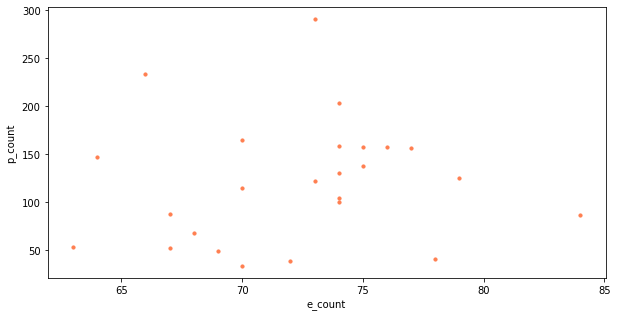

In [240]:
tdf.plot(kind='scatter', x='e_count', y='p_count',  c='coral', s=10, figsize=(10, 5))
plt.show()

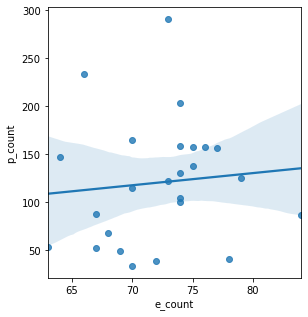

In [241]:
fig = plt.figure(figsize=(10, 5))  
ax1 = fig.add_subplot(1, 2, 1)
sns.regplot(x='e_count', y='p_count', data=tdf, ax=ax1)                 # 회귀선 표시
plt.show()

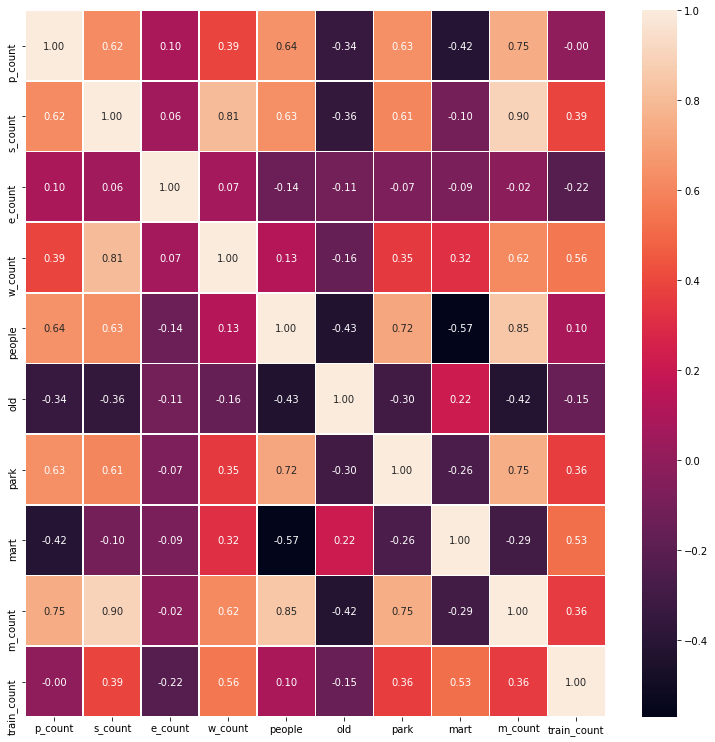

In [242]:
f,ax = plt.subplots(figsize=(13, 13))
sns.heatmap(test.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

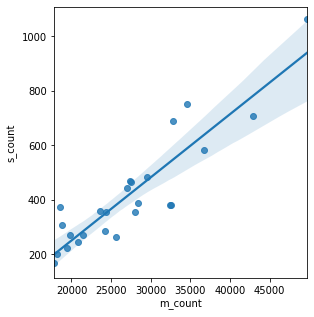

In [260]:
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
sns.regplot(x='m_count', y='s_count', data=test)                 # 회귀선 표시
plt.show()

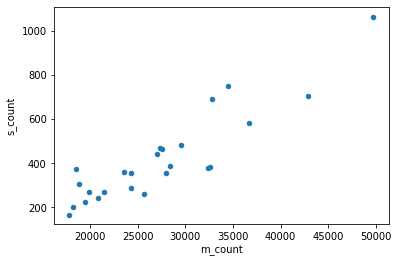

In [257]:
test.plot(kind = 'scatter', x = 'm_count', y = 's_count',)

In [245]:
model = KMeans(n_clusters=4, random_state=0 , algorithm='auto')
# n_clusters=3 : 군집의 개수 (k) (이미 알고 있음)
# random_state=0 : seed 역할 (모델을 일정하게 생성 = 랜덤X)
model.fit(tdf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [246]:
pred = model.predict(tdf)
pred
len(pred)

25

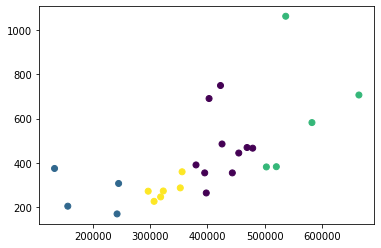

In [247]:
plt.scatter(x=tdf['people'], y=tdf['s_count'], c=pred)

In [248]:
plt.figure(figsize = (10, 6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

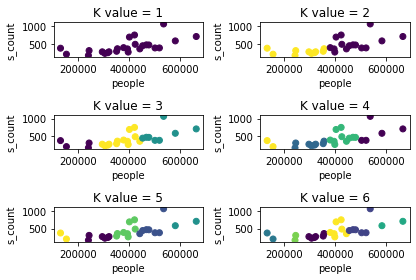

In [249]:
for i in range(1, 7):
    estimator = KMeans(n_clusters = i)
    idx = estimator.fit_predict(test_data[['people', 's_count']])
       # 2행 3열을 가진 서브플롯 추가 (인덱스 = i) 
    plt.subplot(3, 2, i)
    plt.tight_layout()
        # 서브플롯의 라벨링
    plt.title("K value = {}".format(i))
    plt.xlabel('people')
    plt.ylabel('s_count')
        # 클러스터링 그리기
    plt.scatter(test_data['people'], test_data['s_count'], c=idx)  
plt.show()

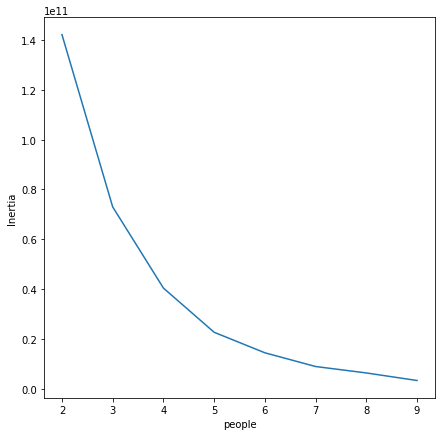

In [250]:
inertia_list = []
k_list = range(2,10)
for k in k_list:
  model = KMeans(n_clusters = k)
  model.fit(test_data)
  inertia_list.append(model.inertia_)

plt.figure(figsize = (7,7))
plt.plot(k_list, inertia_list)
plt.xlabel("people")
plt.ylabel('Inertia')
plt.show()

In [251]:
estimator = KMeans(n_clusters = 5)

In [252]:
cluster_idx = estimator.fit_predict(test_data[['people', 's_count']])

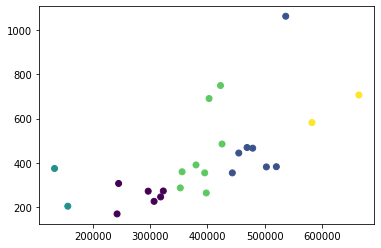

In [253]:
plt.scatter(test_data['people'], test_data['s_count'], c=cluster_idx)

In [254]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(test_data)

In [255]:
X = test_data.iloc[:, [1, 2]].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

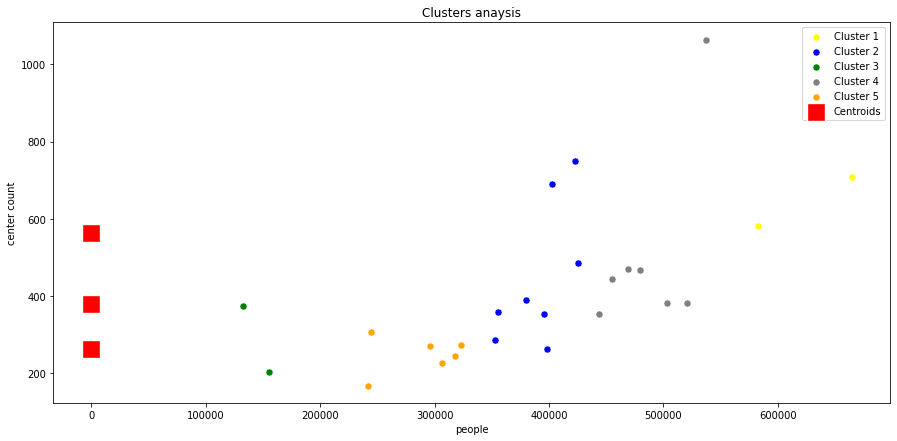

In [263]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters anaysis')
plt.xlabel('people')
plt.ylabel('center count')
plt.legend()
plt.show()